In [1]:
with open('names.txt') as f:
    words = f.read().splitlines()

In [2]:
min(len(w) for w in words)

2

In [3]:
b = {}
for word in words:
    chs = ['<S>'] + [w for w in word] + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1 

In [4]:
sorted(b.items(), key=lambda x: -x[1])

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [5]:
import torch

a = torch.zeros((3, 5), dtype=torch.int32)

In [6]:
N = torch.zeros((28, 28), dtype=torch.int32)


chars = sorted(list(set(''.join(words))))
stoi  = {s:i for i,s in enumerate(chars)}

stoi['<S>'] = 26
stoi['<E>'] = 27
itos = {s:i for i,s in stoi.items()}

print(stoi)

for word in words:
    chs = ['<S>'] + [w for w in word] + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}


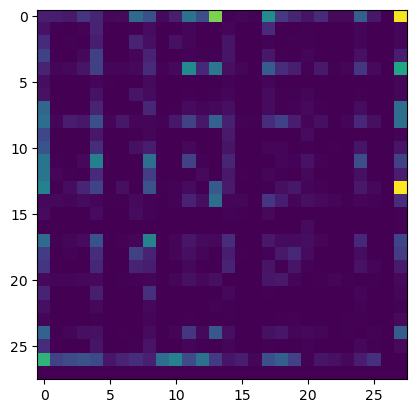

In [7]:
import matplotlib.pyplot as plt
plt.imshow(N)

In [8]:
plt.figure(figsize=(16,16))
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off')

(0.0, 1.0, 0.0, 1.0)

In [9]:
# Re order the chars in the mapping (2 tokes at the end) to 1 token at the end 
stoi  = {s:(i + 1) for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {s:i for i,s in stoi.items()}

N = torch.zeros((27, 27), dtype=torch.int32)
for word in words:
    chs = ['.'] + [w for w in word] + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

In [10]:
# Sampling - start from  . and end at .
N[0, :] # - probabilities of how often there is a prob for occurance of this letter at the start

# Sample from teh n - by creating the probabilities 
p = N[0].float()
p = p / p.sum()
p


tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [11]:
# Using Torch.multinomial 
# -- input : probabilies + output - integer
gen = torch.Generator().manual_seed(204)
p = torch.rand(3, generator=gen)
p = p / p.sum()
p

torch.multinomial(p, num_samples=10, replacement=True)

tensor([2, 1, 2, 0, 1, 2, 1, 1, 1, 1])

In [12]:
# Extract the first token
gen = torch.Generator().manual_seed(204)
p = N[0].float()
p = p / p.sum()
ix = torch.multinomial(p ,num_samples=1, replacement=True).item()
itos.get(ix)

't'

In [13]:
# Brute force 

ix = 0

for i in range(20):
    while True:
        p = N[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p,num_samples=1).item()
        print(itos[ix], end = '')
        if ix == 0:
            print('')
            break

zalyelay.
rulilievieud.
kiao.
ja.
s.
om.
briavasaroliaiteyle.
s.
kasutoerela.
agaidonitahar.
abahry.
gilrizyna.
samauseysakekhenelni.
arie.
atrehan.
waisycemanit.
jevalesa.
jarvign.
a.
y.


In [14]:
# Optimised - 1 
P = (N+1).float()
P = P / P.sum(1, keepdim=True)

for i in range(20):
    while True:
        # p = N[ix].float()
        # p = p / p.sum()
        p = P[ix]
        ix = torch.multinomial(p,num_samples=1).item()
        print(itos[ix], end = '')
        if ix == 0:
            print('')
            break

avreno.
n.
lierarraa.
sylkon.
yaki.
jheimane.
crdelolan.
me.
yly.
ckled.
mylyohe.
elydamyxle.
jalliquleldaigreylange.
emedrelah.
kah.
jalohioya.
ze.
riamm.
likadale.
neloton.


In [15]:
# Quality of the model 
log_likelihood = 0
n = 0
for word in ['markqzi']:
    chs = ['.'] + [w for w in word] + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        log_likelihood += torch.log(P[ix1, ix2])
        print(f'{ch1}{ch2} : {torch.log(P[ix1, ix2])}')
        n += 1
        # print(f'{ch1}{ch2}')
print(f'{-log_likelihood/n}')

.m : -2.5358388423919678
ma : -0.9454260468482971
ar : -2.3405091762542725
rk : -4.940621376037598
kq : -8.53050422668457
qz : -5.700443744659424
zi : -1.8936893939971924
i. : -1.9628626108169556
3.6062369346618652


In [16]:
xs = []
ys = []

for word in words:
    chs = ['.'] + [w for w in word] + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [17]:
# One hot encoding of the integers
import torch.nn.functional as f
x_enc  = f.one_hot(xs, num_classes = 27).float() # cast the enc into float
x_enc

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 1., 0., 0.]])

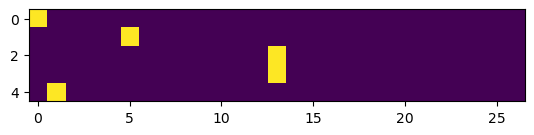

In [18]:
plt.imshow(x_enc[:5]) # Encode integers into vectors

In [19]:
# Neuron takes input vectors
# -- wx + b (dot product)
# -- -- (5, 27) * (27, 27) = (5, 27)

x_enc = x_enc[:5]
w = torch.randn((27, 27)) # drad from a normal distribution - represent the output (next char)
x_enc @ w # N activations of the neurons (paralelly for 5 neurons) - N = batch size here 5

tensor([[ 3.7552e-01,  1.9298e-01, -7.0593e-01, -8.1199e-01, -1.4476e+00,
         -1.3549e+00, -1.0113e+00,  9.7124e-01, -2.1814e+00, -1.8391e+00,
         -9.4277e-01,  5.9081e-01,  5.6608e-01,  1.5311e+00, -1.6281e+00,
          4.3766e-01,  1.9240e+00,  1.0068e+00,  5.6508e-02, -4.9092e-02,
          1.3138e+00,  4.6626e-01,  6.7693e-01,  1.5383e-01, -3.4019e-01,
          1.6746e-02,  1.0463e-03],
        [ 5.1485e-02, -1.9465e-01, -2.8310e-03, -5.6141e-01, -1.1706e+00,
         -1.4354e-01,  1.5885e+00, -3.9159e-01,  7.1852e-01,  9.2946e-01,
          7.1111e-01, -8.0825e-02,  1.9812e-01,  4.2828e-01, -1.6090e+00,
         -7.5258e-01,  3.7496e-01,  1.0668e+00,  2.1852e+00, -1.7151e+00,
          6.3447e-01,  4.4896e-01, -1.5503e-01, -7.5263e-01, -5.5956e-01,
          1.2713e+00,  1.7863e-01],
        [-5.0457e-01, -1.2540e+00, -1.1668e+00,  3.3628e-01, -3.3826e-01,
         -1.9372e-01,  6.8614e-01, -6.1153e-01, -2.2108e-01, -1.2327e+00,
          5.2866e-01, -2.0515e+00,  4.75

In [20]:
# - **→ Negative numbers → e^numbers → numbers less than one**
# **→ Positive numbers → e^numbers → numbers greater than one**

(x_enc @ w).exp()  

# The NN is now predicting the counts
# -- Are called as the logits (Equivatent of N
logits = (x_enc @ w)
counts = logits.exp()
probs = counts / counts.sum(1, keepdims = True)

# -- For each word - we get a output - interpret as probabilities 
# -- -- log counts -> exponentiate the counts to look like coutns and create a probability distribution of the counts

In [21]:
probs[0]

tensor([0.0360, 0.0300, 0.0122, 0.0110, 0.0058, 0.0064, 0.0090, 0.0653, 0.0028,
        0.0039, 0.0096, 0.0446, 0.0435, 0.1142, 0.0049, 0.0383, 0.1692, 0.0676,
        0.0261, 0.0235, 0.0919, 0.0394, 0.0486, 0.0288, 0.0176, 0.0251, 0.0247])

In [22]:
# Genrate a random hidden layer of NN
# -- encode the input
xs = xs[:5]
ys = ys[:5]
w = torch.rand((27, 27))  
xenc = f.one_hot(xs, num_classes=27).float()
logits = x_enc @ w
# This is called a soft max -> takes the linear layer and tuens into probabilities
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)


In [23]:
# For the first word
# -- w.r.t. loss we tune the w and recheck the values of nll
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    
    p = probs[i, y]
    logp = torch.log(p)
    nll = -logp
    print(probs[i])
    print(x, y, p, nll)


tensor([0.0255, 0.0483, 0.0480, 0.0307, 0.0334, 0.0257, 0.0258, 0.0469, 0.0361,
        0.0380, 0.0424, 0.0202, 0.0481, 0.0353, 0.0315, 0.0442, 0.0436, 0.0515,
        0.0380, 0.0392, 0.0254, 0.0294, 0.0440, 0.0466, 0.0345, 0.0337, 0.0341])
0 5 tensor(0.0257) tensor(3.6629)
tensor([0.0476, 0.0306, 0.0299, 0.0247, 0.0339, 0.0508, 0.0239, 0.0326, 0.0297,
        0.0350, 0.0389, 0.0335, 0.0532, 0.0475, 0.0413, 0.0237, 0.0362, 0.0484,
        0.0612, 0.0458, 0.0235, 0.0328, 0.0261, 0.0299, 0.0242, 0.0474, 0.0479])
5 13 tensor(0.0475) tensor(3.0471)
tensor([0.0303, 0.0255, 0.0294, 0.0297, 0.0505, 0.0225, 0.0490, 0.0333, 0.0454,
        0.0415, 0.0247, 0.0403, 0.0399, 0.0490, 0.0251, 0.0431, 0.0286, 0.0305,
        0.0241, 0.0537, 0.0608, 0.0401, 0.0294, 0.0278, 0.0380, 0.0351, 0.0527])
13 13 tensor(0.0490) tensor(3.0159)
tensor([0.0303, 0.0255, 0.0294, 0.0297, 0.0505, 0.0225, 0.0490, 0.0333, 0.0454,
        0.0415, 0.0247, 0.0403, 0.0399, 0.0490, 0.0251, 0.0431, 0.0286, 0.0305,
        0.02

In [24]:
w = torch.randn((27, 27), requires_grad=True, dtype=torch.float32)

In [25]:
(w**2).mean() # -- no signs anymore, negative and positive merged , 0 - no loss ,else loss accumulate

tensor(1.0724, grad_fn=<MeanBackward0>)

In [26]:
xs = []
ys = []

for word in words:
    chs = ['.'] + [w for w in word] + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

for i in range(200):
    # Forrward pass 
    x_enc = f.one_hot(xs, num_classes=27).float()  # Corrected variable name from xenc to x_enc
    logits = x_enc @ w
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)  # Corrected keepdims to keepdim

    # Pluck the pobabilities of the output prediction from the ys position 
    # -- can take the list of indices in the input -- very usefull
    # -- in case of forward pass
    loss = -probs[torch.arange(len(xs)), ys].log().mean() + 0.01*(w**2).mean() # Tries to make w = 0 , else loss (w -> 0)
    # Backward pass 
    # -- set the gradients from prev iteration to none 
    w.grad = None 
    # Gradent upto the w - tract and update teh w 
    loss.backward() # Keeps tract of all the dependencies of the forward pass 
    w.data  -= 50 * w.grad # These are just the log counts of the numbersw 
    if i%20 == 0 : print(loss)

tensor(3.8437, grad_fn=<AddBackward0>)
tensor(2.5880, grad_fn=<AddBackward0>)
tensor(2.5255, grad_fn=<AddBackward0>)
tensor(2.5052, grad_fn=<AddBackward0>)
tensor(2.4960, grad_fn=<AddBackward0>)
tensor(2.4909, grad_fn=<AddBackward0>)
tensor(2.4879, grad_fn=<AddBackward0>)
tensor(2.4860, grad_fn=<AddBackward0>)
tensor(2.4847, grad_fn=<AddBackward0>)
tensor(2.4838, grad_fn=<AddBackward0>)


In [27]:
# Sampleing from nn 
for i in range(5):
    out = []
    ix = 0
    while True:
        # In case os bigram
        # p = P[ix]
        x_enc = f.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x_enc @ w
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

chadarquian.
toriaammey.
rionyn.
juessa.
ve.


In [42]:
import random

def build_dataset(words):
    block_size=3
    X, Y = [], []

    for w in words:
        context = [0]*block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)

            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)

    print(f'Shape of input and output tensors : {X.shape, Y.shape}')
    return X, Y

random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtr, Ytr = build_dataset(words[n2:])


Shape of input and output tensors : (torch.Size([182531, 3]), torch.Size([182531]))
Shape of input and output tensors : (torch.Size([22759, 3]), torch.Size([22759]))
Shape of input and output tensors : (torch.Size([22856, 3]), torch.Size([22856]))


In [40]:
# Training again 
C = torch.randn((27, 2))
w1 = torch.randn((6,100))
b1 = torch.randn(100)
w2  = torch.randn((100, 27))
b2 = torch.randn(27)

parameters = [C, w1, w2, b1, b2]

for param in parameters:
    param.requires_grad = True

lre = torch.linspace(-3,0,1000)
lr = 10**lre

for i in range(1000):
    ix = torch.randint(0, X.shape, )
 

Shape of input and output tensors : (torch.Size([228146, 3]), torch.Size([228146]))


In [35]:
X

NameError: name 'X' is not defined